In [2]:
# import sys 
# sys.path.append("..")


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
import nxviz as nv

from Leviathan.Island import Island
from Leviathan.Member import Member
from Leviathan.Analyzer import Analyzer
from time import time
from Leviathan.Land import Land
from utils import save
import os

/var/folders/yt/3k3ggbjn7tx8fw7yp_fvf6sh0000gn/T/ipykernel_901/2915504201.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/lichenyu/miniconda3/envs/python310/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl

In [3]:
rng = np.random.default_rng()
path = save.datetime_dir("../data")
island = Island(300, (20, 20), path, 2023)
Island._RECORD_PERIOD = 1
Member._DECISION_BACKEND = 'inner product'
Member._PARAMETER_INFLUENCE = 0
# island = Island.load_from_pickle("data/Nov/15_13-23/180.pkl")

Current save directory: ../data/Mar/14_17-59/


In [4]:
import time
action_prob = 0.5

for i in range(350):
    start_time = time.time()
    
    island.new_round()
    print("new_round runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.get_neighbors()
    print("get_neighbors runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.trade(action_prob)
    print("trade runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.land_distribute(action_prob)
    print("land_distribute runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.colonize()
    print("colonize runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.consume()
    print("consume runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.fight(action_prob)
    print("fight runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.produce()
    print("produce runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.reproduce(action_prob)
    print("reproduce runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.record_statistics()
    print("record_statistics runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.log_status(
        action=True,
        summary=True,
        members=True,
        log_instead_of_print=False
    )
    print("log_status runtime:", time.time() - start_time)
    
    start_time = time.time()
    island.log_status(
        action=True,
        summary=True,
        members=True,
        log_instead_of_print=True
    )
    print("log_status runtime:", time.time() - start_time)
    
    if island.is_dead:
        break


new_round runtime: 0.022613048553466797
get_neighbors runtime: 6.4063880443573
trade runtime: 3.0222809314727783
land_distribute runtime: 0.0998070240020752
colonize runtime: 0.01099395751953125
consume runtime: 0.010550975799560547
fight runtime: 1.583616018295288
produce runtime: 4.696846008300781e-05
reproduce runtime: 0.017679214477539062
record_statistics runtime: 0.0016341209411621094
##################### 1 #####################
===================== 攻击 =====================
	Rickie(233) --18.2-> Jonpaul(172) 
	Rickie(233) --54.6-> Ebonye(204) 
	Rickie(233) --11.6-> Lajoy(280) 
	Rickie(233) --18.0-> Gissel(291) 
	Rickie(233) --13.9-> Doyal(185) 
	Rickie(233) --23.8-> Charise(90) 
	Rickie(233) --22.5-> Calib(101) 
	Rickie(233) --29.2-> Ramos(155) 
	Rickie(233) --18.6-> Ameshia(198) 
	Rickie(233) --13.5-> Garron(25) 
	Rickie(233) --20.5-> Kentrel(62) 
	Rickie(233) --44.6-> Raynard(169) 
	Lashanna(74) --32.5-> Haroon(238) 
	Lashanna(74) --25.5-> Larenzo(68) 
	Lashanna(74) --25.1-> 

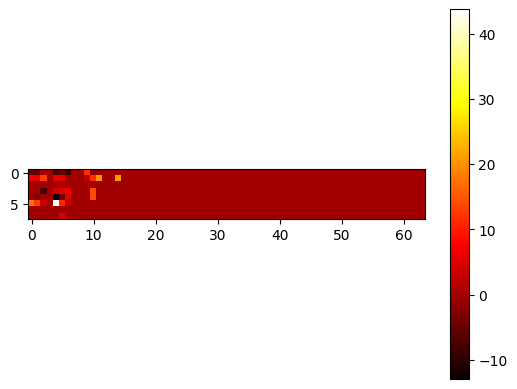

array([[ -4.37196648,  -5.56129856,   0.76389336,   0.        ,
         -7.73731125,  -4.71650675,  -8.68676219,   0.        ,
          0.        ,  11.84471807,  -1.63005166,  -1.0530223 ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [5]:
import matplotlib.pyplot as plt

# Visualize the matrix
plt.imshow(island.record_payoff_matrix, cmap='hot')
plt.colorbar()
plt.show()
island.record_payoff_matrix

In [5]:
action_prob = 0.5

for i in range(300):
    island.new_round()
    island.get_neighbors()
    island.trade(action_prob)
    island.land_distribute(action_prob)
    island.colonize()
    island.consume()
    island.fight(action_prob)
    island.produce()
    island.reproduce(action_prob)
    island.record_statistics()
    island.log_status(
        action=True,
        summary=True,
        members=True,
        log_instead_of_print=True
    )
    # island.log_status(
    #     action=True,
    #     summary=True,
    #     members=True,
    #     log_instead_of_print=True
    # )

    if island.is_dead:
        break


##################### 351 #####################
===================== 攻击 =====================
	Micky(505) --8.5-> Marisella(517) 
	Anders(519) --4.3-> Salvador(521) 
	Anders(519) --3.9-> Marisella(517) 
	Modesta(522) --10.4-> Salvador(521) 
	Modesta(522) --11.8-> Marisella(517) 
	Modesta(522) --6.4-> Micky(505) 
	Marisella(517) --6.6-> Anders(519) 
	Marisella(517) --10.3-> Modesta(522) 
===================== 给予 =====================
==================== 给予土地 ====================
本轮出生：[] 
本轮死亡：[Sharis(515), Raylynn(520)] 
本轮总给予：0.0 
本轮总攻击：62.3 
本轮总产量：135.7 
本轮总消耗：51.5 
本轮活跃比率：[12.4543631  0.         0.         0.       ] 
本轮比率历史排位：(1.0, 0.5, 0.5) 
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数 
	[505, 0] Micky:        40,   39.0,   44.0   22(5.5%)
	[517, 1] Marisella:    4,   36.4,   22.8   8(2.0%)
	[519, 2] Anders:       3,   25.2,   24.4   8(2.0%)
	[521, 3] Salvador:     2,   15.8,   20.2   6(1.5%)
	[522, 4] Modesta:      2,   34.2,   24.2   6(1.5%)

##################### 352 ########

In [27]:
island.record_historic_ranking_list

[(0, 0, 0),
 (0.5, 0.5, 0.5),
 (1.0, 1.0, 1.0),
 (0.75, 0.75, 1.0),
 (0.6, 0.6, 1.0),
 (0.6666666666666666, 0.5, 1.0),
 (0.5714285714285714, 0.8571428571428571, 0.7142857142857143),
 (0.625, 0.125, 0.5),
 (0.8888888888888888, 0.1111111111111111, 0.4444444444444444),
 (0.7, 0.8, 0.5),
 (0.9090909090909091, 0.8181818181818182, 0.36363636363636365),
 (0.9166666666666666, 0.08333333333333333, 0.4166666666666667),
 (0.9230769230769231, 0.6923076923076923, 0.38461538461538464),
 (0.9285714285714286, 0.07142857142857142, 0.35714285714285715),
 (0.9333333333333333, 0.7333333333333333, 0.4666666666666667),
 (0.8125, 0.0625, 0.25),
 (0.9411764705882353, 0.058823529411764705, 0.35294117647058826),
 (0.8888888888888888, 0.05555555555555555, 0.5555555555555556),
 (0.8947368421052632, 0.9473684210526315, 0.42105263157894735),
 (0.9, 0.75, 0.15),
 (0.7619047619047619, 0.7619047619047619, 0.19047619047619047),
 (0.9545454545454546, 0.9090909090909091, 0.22727272727272727),
 (0.782608695652174, 0.04347

In [25]:
island.record_historic_ratio_list[:,1]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.24328985e+02, 1.07949696e+02, 1.29032258e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## Analyze

In [12]:
param_a = [('offer_land_victim_passive', -0.9523368261010298),
 ('attack_victim_overlap', -0.9513551487207219),
 ('offer_obj_cargo', -0.9344102878383577),
 ('attack_obj_vitality', -0.889839442343325),
 ('offer_obj_productivity', -0.8673566654327822),
 ('reproduce_victim_active', -0.7823827974532845),
 ('attack_obj_neighbor', -0.7760075042827729),
 ('offer_land_obj_neighbor', -0.6967330911522318),
 ('attack_benefit_land_passive', -0.6967080795689908),
 ('offer_land_obj_cargo', -0.6649975254727105),
 ('attack_benefit_passive', -0.6150020944998835),
 ('offer_obj_neighbor', -0.6030699393644137),
 ('offer_land_obj_vitality', -0.5698185514515387),
 ('clear_victim_passive', -0.5689390638053728),
 ('offer_obj_vitality', -0.5301699670535353),
 ('reproduce_victim_passive', -0.4867343563278551),
 ('offer_victim_passive', -0.3465396459506399),
 ('offer_land_obj_productivity', -0.3386513793180928),
 ('clear_victim_active', -0.3318078178218572),
 ('clear_self_neighbor', -0.2846032297407419),
 ('offer_self_age', -0.2655540666406667),
 ('reproduce_self_age', -0.25916597881789366),
 ('attack_benefit_active', -0.25821650392609136),
 ('offer_land_obj_age', -0.2302875696969734),
 ('offer_land_victim_active', -0.16617831415715173),
 ('clear_self_cargo', -0.16082718434667723),
 ('offer_benefit_active', -0.13497982353039148),
 ('clear_self_productivity', -0.12355162813246379),
 ('attack_self_neighbor', -0.12114517415297985),
 ('attack_self_productivity', -0.11119989054370219),
 ('clear_obj_neighbor', -0.10727762231753918),
 ('attack_benefit_land_overlap', -0.08545386299801803),
 ('reproduce_obj_age', -0.07865439896756499),
 ('attack_obj_productivity', -0.07587417313249176),
 ('offer_land_self_age', -0.07446537287380353),
 ('clear_obj_vitality', -0.005479626975739782),
 ('offer_land_benefit_active', 0.004484056815641069),
 ('offer_benefit_overlap', 0.04057126310724432),
 ('clear_obj_age', 0.04521535781955294),
 ('offer_land_benefit_land_active', 0.08073078600304709),
 ('attack_benefit_land_active', 0.08113655695828241),
 ('clear_self_age', 0.10564769920470288),
 ('clear_self_vitality', 0.1072021345761621),
 ('attack_self_age', 0.1318654808026531),
 ('attack_obj_age', 0.15727601592744178),
 ('attack_victim_active', 0.1622358642073793),
 ('offer_victim_active', 0.17296699901393767),
 ('clear_obj_cargo', 0.17864148157221527),
 ('offer_benefit_land_active', 0.1848393250386023),
 ('offer_obj_age', 0.1860487835930814),
 ('reproduce_self_vitality', 0.19441484316960356),
 ('attack_benefit_overlap', 0.1973084957168838),
 ('offer_land_benefit_overlap', 0.1973525787114027),
 ('reproduce_self_neighbor', 0.20038264245577944),
 ('offer_land_self_productivity', 0.21650932958526078),
 ('attack_obj_cargo', 0.2390764081249076),
 ('reproduce_benefit_land_overlap', 0.3228732003341323),
 ('offer_land_self_cargo', 0.3335008532162037),
 ('clear_benefit_land_overlap', 0.34045678323345163),
 ('offer_self_productivity', 0.34157326723776227),
 ('offer_land_self_vitality', 0.3524280063131394),
 ('offer_land_benefit_land_passive', 0.36762873838148225),
 ('clear_obj_productivity', 0.37926482515118437),
 ('reproduce_obj_vitality', 0.3837436333793566),
 ('offer_land_self_neighbor', 0.3939182626450498),
 ('offer_land_benefit_land_overlap', 0.39796224064904084),
 ('attack_victim_passive', 0.4182725329620632),
 ('offer_victim_overlap', 0.435053097385763),
 ('reproduce_obj_cargo', 0.44244196038358297),
 ('clear_benefit_overlap', 0.45975357395463096),
 ('reproduce_benefit_overlap', 0.4909720360052141),
 ('reproduce_benefit_land_passive', 0.4939201480124853),
 ('offer_benefit_land_passive', 0.49453990771703943),
 ('offer_self_cargo', 0.5237915486381632),
 ('offer_self_vitality', 0.5412164027214318),
 ('reproduce_self_productivity', 0.5576125110857608),
 ('reproduce_self_cargo', 0.5667974332622626),
 ('clear_victim_overlap', 0.5702930808980109),
 ('offer_land_benefit_passive', 0.5750848109107234),
 ('clear_benefit_passive', 0.6054622427309052),
 ('reproduce_obj_productivity', 0.6082373707282593),
 ('reproduce_benefit_land_active', 0.6109017664352947),
 ('offer_land_victim_overlap', 0.6237361202205145),
 ('reproduce_victim_overlap', 0.6718789370121488),
 ('reproduce_benefit_active', 0.6727817166360059),
 ('offer_self_neighbor', 0.7794184841708344),
 ('offer_benefit_passive', 0.8358477257646046),
 ('clear_benefit_land_active', 0.841251973820372),
 ('attack_self_cargo', 0.8508551991689319),
 ('clear_benefit_active', 0.8594164309495036),
 ('clear_benefit_land_passive', 0.8938153899560835),
 ('attack_self_vitality', 0.9428036970699326),
 ('reproduce_benefit_passive', 0.953464073325589),
 ('reproduce_obj_neighbor', 1.0036501363886015),
 ('offer_benefit_land_overlap', 1.0407727625150927)]

param_b = [('attack_obj_neighbor', -0.8815835243005784),
 ('offer_land_obj_productivity', -0.6529243278350749),
 ('attack_obj_vitality', -0.647121539362216),
 ('offer_obj_vitality', -0.6391354716609209),
 ('offer_land_obj_cargo', -0.5599998478463217),
 ('offer_victim_passive', -0.558565810569878),
 ('attack_benefit_land_passive', -0.5181634933365569),
 ('clear_victim_passive', -0.5107502852127687),
 ('offer_obj_cargo', -0.5052671049566952),
 ('reproduce_victim_active', -0.4537278546382578),
 ('attack_victim_overlap', -0.4532869782023467),
 ('offer_obj_productivity', -0.4530961729030519),
 ('clear_victim_active', -0.43991168395886127),
 ('offer_obj_neighbor', -0.43859488784600587),
 ('reproduce_victim_passive', -0.4237325835930634),
 ('offer_land_obj_neighbor', -0.3780396989033746),
 ('offer_land_self_age', -0.34344180445785544),
 ('offer_land_obj_vitality', -0.3389252824755168),
 ('attack_benefit_passive', -0.3321863458268643),
 ('offer_land_benefit_active', -0.2928195181493402),
 ('clear_obj_neighbor', -0.2572718967867401),
 ('offer_benefit_active', -0.23960625421775314),
 ('offer_benefit_land_active', -0.22800147260610049),
 ('clear_obj_productivity', -0.16739125774316238),
 ('offer_land_victim_active', -0.1614315573276588),
 ('attack_obj_productivity', -0.15471003567073807),
 ('offer_obj_age', -0.14979991310263807),
 ('offer_land_victim_passive', -0.14293707495722624),
 ('reproduce_self_age', -0.116961550246553),
 ('offer_land_benefit_land_active', -0.11061705587422602),
 ('attack_victim_active', -0.09957653974601997),
 ('clear_self_cargo', -0.08997676955399236),
 ('attack_benefit_land_overlap', -0.0762327635681982),
 ('clear_self_neighbor', -0.04442468252645268),
 ('offer_self_age', -0.04183102283076942),
 ('clear_obj_age', -0.03305948876966186),
 ('clear_self_productivity', -0.025361185683890588),
 ('reproduce_obj_age', 0.010073801273035463),
 ('attack_self_age', 0.015281455196536575),
 ('attack_self_neighbor', 0.025740463570866873),
 ('attack_benefit_overlap', 0.04963065899957736),
 ('offer_victim_active', 0.07032316546208685),
 ('offer_land_obj_age', 0.11892516379213985),
 ('attack_self_productivity', 0.12076311138269491),
 ('attack_benefit_active', 0.1232444849404819),
 ('clear_self_age', 0.1280965204584122),
 ('offer_benefit_overlap', 0.13679648774120595),
 ('attack_obj_age', 0.14102183462678863),
 ('clear_obj_cargo', 0.14510568901077792),
 ('offer_land_benefit_overlap', 0.17360345134543068),
 ('offer_land_benefit_land_passive', 0.20068619930070264),
 ('clear_benefit_overlap', 0.2053253058392876),
 ('clear_obj_vitality', 0.21641772584172647),
 ('clear_self_vitality', 0.2460924459938334),
 ('attack_benefit_land_active', 0.2544960976916585),
 ('offer_land_benefit_land_overlap', 0.28922868749577146),
 ('reproduce_self_vitality', 0.2937370619145103),
 ('reproduce_obj_vitality', 0.32460462014397384),
 ('offer_land_self_cargo', 0.328574158913278),
 ('clear_benefit_passive', 0.3339174303348485),
 ('reproduce_benefit_overlap', 0.3402921778060102),
 ('clear_victim_overlap', 0.3625101816628387),
 ('offer_land_victim_overlap', 0.3985783816087685),
 ('reproduce_self_productivity', 0.427401247496788),
 ('attack_self_cargo', 0.42897737036992284),
 ('offer_self_productivity', 0.43521991886560285),
 ('offer_benefit_passive', 0.4364536533846104),
 ('reproduce_obj_cargo', 0.44858437772824306),
 ('offer_land_benefit_passive', 0.4517660905987828),
 ('reproduce_victim_overlap', 0.45974112474209866),
 ('reproduce_obj_neighbor', 0.47457411535175525),
 ('offer_self_vitality', 0.4947119974458736),
 ('reproduce_benefit_land_active', 0.5050595034973142),
 ('offer_land_self_productivity', 0.5109666441850518),
 ('offer_victim_overlap', 0.5305815603841029),
 ('reproduce_self_neighbor', 0.5377041727764486),
 ('attack_self_vitality', 0.5489523628976877),
 ('reproduce_obj_productivity', 0.5980393973275482),
 ('offer_benefit_land_passive', 0.6066657438159466),
 ('offer_self_neighbor', 0.6257869353374295),
 ('clear_benefit_land_passive', 0.6289351801225171),
 ('reproduce_benefit_land_overlap', 0.6634900632233232),
 ('reproduce_benefit_active', 0.6747012589874359),
 ('attack_victim_passive', 0.678365858323856),
 ('reproduce_benefit_land_passive', 0.6786331630918729),
 ('offer_self_cargo', 0.7092534561871191),
 ('offer_land_self_neighbor', 0.7226857042199786),
 ('offer_land_self_vitality', 0.7234796618050129),
 ('reproduce_self_cargo', 0.7311984078307885),
 ('clear_benefit_active', 0.73399265172772),
 ('offer_benefit_land_overlap', 0.7385065258568624),
 ('clear_benefit_land_overlap', 0.740880711365285),
 ('attack_obj_cargo', 0.828754903267516),
 ('clear_benefit_land_active', 0.924330416169665),
 ('reproduce_benefit_passive', 0.9486229642730047)]

param_c = [('attack_benefit_land_passive', -0.861906736982497),
 ('attack_victim_overlap', -0.7691038191653571),
 ('attack_obj_neighbor', -0.7591837267388275),
 ('attack_obj_vitality', -0.716355145805749),
 ('reproduce_victim_active', -0.680126680102203),
 ('offer_obj_productivity', -0.6786550615265802),
 ('offer_land_victim_passive', -0.6401475868611425),
 ('offer_obj_cargo', -0.619008068864565),
 ('offer_land_obj_neighbor', -0.6159493180213343),
 ('offer_land_obj_productivity', -0.5602929147733517),
 ('offer_victim_passive', -0.5164634443138351),
 ('reproduce_victim_passive', -0.44473218278882015),
 ('offer_land_obj_cargo', -0.43163071198436587),
 ('offer_obj_neighbor', -0.4294637261548417),
 ('offer_obj_vitality', -0.4209659449365558),
 ('clear_victim_active', -0.37084166675917984),
 ('clear_victim_passive', -0.368207425936399),
 ('offer_land_obj_vitality', -0.3648002001714567),
 ('attack_benefit_passive', -0.3434523029328286),
 ('offer_land_victim_active', -0.3101026104207134),
 ('attack_benefit_overlap', -0.25603814142648906),
 ('clear_self_cargo', -0.21624446833414074),
 ('reproduce_obj_age', -0.18811140563933731),
 ('offer_self_age', -0.177203722495772),
 ('offer_land_benefit_active', -0.16570873919940107),
 ('attack_obj_productivity', -0.1464729512918045),
 ('offer_land_benefit_overlap', -0.14236376749846152),
 ('clear_self_neighbor', -0.1319838734713058),
 ('attack_self_neighbor', -0.12765267486049314),
 ('clear_obj_age', -0.1259667942226602),
 ('attack_self_age', -0.12009686555757615),
 ('offer_obj_age', -0.08917582453312924),
 ('offer_benefit_land_active', -0.08517936010812861),
 ('attack_self_productivity', -0.06330925190106763),
 ('offer_land_benefit_land_active', -0.05645650554693408),
 ('offer_land_benefit_land_passive', -0.044703720705480565),
 ('reproduce_self_age', -0.03711892840984625),
 ('clear_self_productivity', -0.024921858032020468),
 ('offer_land_self_age', -0.02247514568451417),
 ('offer_benefit_active', -0.017870800162091083),
 ('attack_victim_active', 0.014507853354070005),
 ('clear_obj_neighbor', 0.024253314858925692),
 ('clear_obj_productivity', 0.027060576157746874),
 ('offer_self_productivity', 0.052713849968232335),
 ('offer_land_self_productivity', 0.05442385540613226),
 ('clear_self_age', 0.06922929979383237),
 ('offer_land_obj_age', 0.08078839591843215),
 ('reproduce_self_neighbor', 0.0921626319479952),
 ('clear_self_vitality', 0.10141862733810414),
 ('reproduce_obj_vitality', 0.11593870952404865),
 ('offer_victim_active', 0.1342232504314414),
 ('attack_benefit_land_overlap', 0.13825293980140807),
 ('clear_benefit_passive', 0.1595785731546957),
 ('attack_benefit_active', 0.16579560404218613),
 ('attack_obj_age', 0.1762240839794581),
 ('attack_victim_passive', 0.2032825128277481),
 ('attack_benefit_land_active', 0.21466675438373423),
 ('offer_land_self_neighbor', 0.25101120101613983),
 ('offer_land_victim_overlap', 0.3003539712958139),
 ('offer_land_self_vitality', 0.3095997508808711),
 ('reproduce_benefit_land_overlap', 0.3311110639693392),
 ('clear_obj_vitality', 0.33410698213498036),
 ('offer_victim_overlap', 0.3398329688858253),
 ('offer_self_cargo', 0.3572205159453241),
 ('clear_victim_overlap', 0.3667087058711984),
 ('offer_self_vitality', 0.40118599510716957),
 ('offer_benefit_overlap', 0.4150482628773205),
 ('clear_obj_cargo', 0.4173633555870735),
 ('offer_land_benefit_passive', 0.428996557918217),
 ('reproduce_obj_productivity', 0.4356573211912021),
 ('reproduce_self_cargo', 0.4374454543985844),
 ('reproduce_benefit_land_active', 0.46455989740830006),
 ('reproduce_benefit_overlap', 0.4796919174849316),
 ('clear_benefit_land_overlap', 0.5075910529499926),
 ('reproduce_victim_overlap', 0.5084986445516929),
 ('offer_benefit_land_passive', 0.5527379373374515),
 ('clear_benefit_overlap', 0.553375688962319),
 ('reproduce_benefit_land_passive', 0.5557046129583306),
 ('attack_self_vitality', 0.5794122864451072),
 ('reproduce_obj_cargo', 0.5821791713669959),
 ('offer_land_benefit_land_overlap', 0.6009556561786937),
 ('offer_self_neighbor', 0.6079892088709152),
 ('offer_benefit_passive', 0.6204605198582896),
 ('reproduce_self_productivity', 0.6571772592562344),
 ('reproduce_self_vitality', 0.6693161607122787),
 ('reproduce_benefit_passive', 0.6781951573126531),
 ('attack_obj_cargo', 0.700332526958834),
 ('clear_benefit_active', 0.7050718356600533),
 ('clear_benefit_land_active', 0.7114310946130739),
 ('attack_self_cargo', 0.7344340885824281),
 ('offer_land_self_cargo', 0.7473102068899525),
 ('clear_benefit_land_passive', 0.7857530148939263),
 ('reproduce_benefit_active', 0.8255219364044121),
 ('offer_benefit_land_overlap', 0.8398697041649963),
 ('reproduce_obj_neighbor', 0.8916001864005794)]

param_d = [('attack_obj_vitality', -0.8648524888181929),
 ('attack_obj_neighbor', -0.783968914211336),
 ('offer_land_victim_passive', -0.7396430943617117),
 ('attack_victim_overlap', -0.6607189565749187),
 ('offer_land_obj_cargo', -0.6464706331918234),
 ('reproduce_victim_active', -0.6283705413466183),
 ('offer_land_obj_neighbor', -0.627846065967942),
 ('offer_obj_productivity', -0.6269381868134152),
 ('offer_land_obj_vitality', -0.5371364586011955),
 ('attack_benefit_passive', -0.502600511821987),
 ('offer_obj_cargo', -0.5010126804027252),
 ('offer_land_benefit_active', -0.49609459267258804),
 ('attack_benefit_land_passive', -0.46911701499188985),
 ('offer_victim_passive', -0.4667980705078314),
 ('reproduce_victim_passive', -0.4217197726375202),
 ('offer_obj_neighbor', -0.397690951087117),
 ('clear_self_neighbor', -0.3953684977536015),
 ('attack_benefit_overlap', -0.35842406245561736),
 ('offer_land_obj_productivity', -0.34918395459633345),
 ('clear_victim_passive', -0.2988595940166263),
 ('clear_victim_active', -0.2978425315162818),
 ('offer_obj_vitality', -0.23989518997957932),
 ('attack_obj_productivity', -0.17643263641037435),
 ('reproduce_obj_age', -0.17401739785983028),
 ('clear_obj_vitality', -0.17114260123515848),
 ('reproduce_self_age', -0.11746902375667491),
 ('attack_benefit_active', -0.11582947525503728),
 ('offer_self_age', -0.11433960405703288),
 ('clear_obj_cargo', -0.1081945925581104),
 ('clear_obj_age', -0.10472272777938901),
 ('attack_victim_active', -0.09782528952030033),
 ('attack_self_productivity', -0.09734768271941774),
 ('offer_land_obj_age', -0.0935784049475078),
 ('offer_land_self_age', -0.07321552752711995),
 ('offer_land_victim_active', -0.06017169710717124),
 ('attack_self_neighbor', -0.05669976309647512),
 ('clear_obj_neighbor', -0.03471788503673693),
 ('offer_land_benefit_overlap', -0.034146935176046014),
 ('attack_self_age', -0.016950090926453616),
 ('clear_self_cargo', -0.0008223650170797459),
 ('clear_self_age', 0.006453704258431905),
 ('offer_benefit_active', 0.0304672511690932),
 ('clear_obj_productivity', 0.08226599097430189),
 ('offer_obj_age', 0.10051931130859888),
 ('reproduce_self_neighbor', 0.1384134947026122),
 ('clear_self_productivity', 0.14127569870686513),
 ('reproduce_benefit_passive', 0.14839928806016678),
 ('attack_benefit_land_active', 0.18178077385507366),
 ('attack_obj_age', 0.18705754400153635),
 ('attack_victim_passive', 0.18993301412763416),
 ('reproduce_benefit_land_overlap', 0.1919773675842726),
 ('offer_land_benefit_land_passive', 0.20668030529475906),
 ('offer_benefit_land_passive', 0.21726045972772468),
 ('reproduce_obj_vitality', 0.2394882269773527),
 ('offer_self_vitality', 0.2520941494520459),
 ('offer_benefit_land_active', 0.260309350880213),
 ('clear_self_vitality', 0.26237792301490886),
 ('clear_benefit_land_overlap', 0.28345126721732206),
 ('clear_victim_overlap', 0.28813194234126704),
 ('attack_benefit_land_overlap', 0.2940554078394235),
 ('reproduce_self_cargo', 0.31759995543306047),
 ('clear_benefit_passive', 0.33003931412473847),
 ('offer_land_self_productivity', 0.3363332470118088),
 ('offer_land_victim_overlap', 0.33705999770944883),
 ('reproduce_self_productivity', 0.33844612954452447),
 ('offer_benefit_overlap', 0.355540011076239),
 ('offer_land_benefit_land_active', 0.3685711697885752),
 ('clear_benefit_overlap', 0.3734208688248878),
 ('offer_land_self_cargo', 0.3852278604706647),
 ('reproduce_obj_productivity', 0.38570632685665657),
 ('offer_land_self_vitality', 0.3872258900858256),
 ('reproduce_benefit_land_active', 0.4023744769142827),
 ('reproduce_self_vitality', 0.42211963957144594),
 ('offer_benefit_land_overlap', 0.42806693576384147),
 ('offer_victim_active', 0.44130765407833517),
 ('offer_land_benefit_passive', 0.48577764056769085),
 ('offer_self_cargo', 0.49120040972228396),
 ('offer_victim_overlap', 0.5530697325555234),
 ('offer_land_benefit_land_overlap', 0.5630772690458913),
 ('reproduce_victim_overlap', 0.575615412955658),
 ('reproduce_benefit_active', 0.5870500009696445),
 ('attack_obj_cargo', 0.5887794678323585),
 ('reproduce_benefit_land_passive', 0.5963031944960941),
 ('clear_benefit_land_active', 0.5990920832062105),
 ('reproduce_obj_cargo', 0.6711088936015936),
 ('offer_self_neighbor', 0.6715949352756967),
 ('offer_self_productivity', 0.6750066366362488),
 ('attack_self_vitality', 0.6806696373308977),
 ('offer_benefit_passive', 0.6819733076305894),
 ('reproduce_benefit_overlap', 0.7166448798526912),
 ('attack_self_cargo', 0.7915048507881687),
 ('offer_land_self_neighbor', 0.7921548093988375),
 ('clear_benefit_land_passive', 0.8922697592083189),
 ('clear_benefit_active', 0.9065094968774743),
 ('reproduce_obj_neighbor', 1.0440207080357684)]

param_a = dict(param_a)
param_b = dict(param_b)
param_c = dict(param_c)
param_d = dict(param_d)

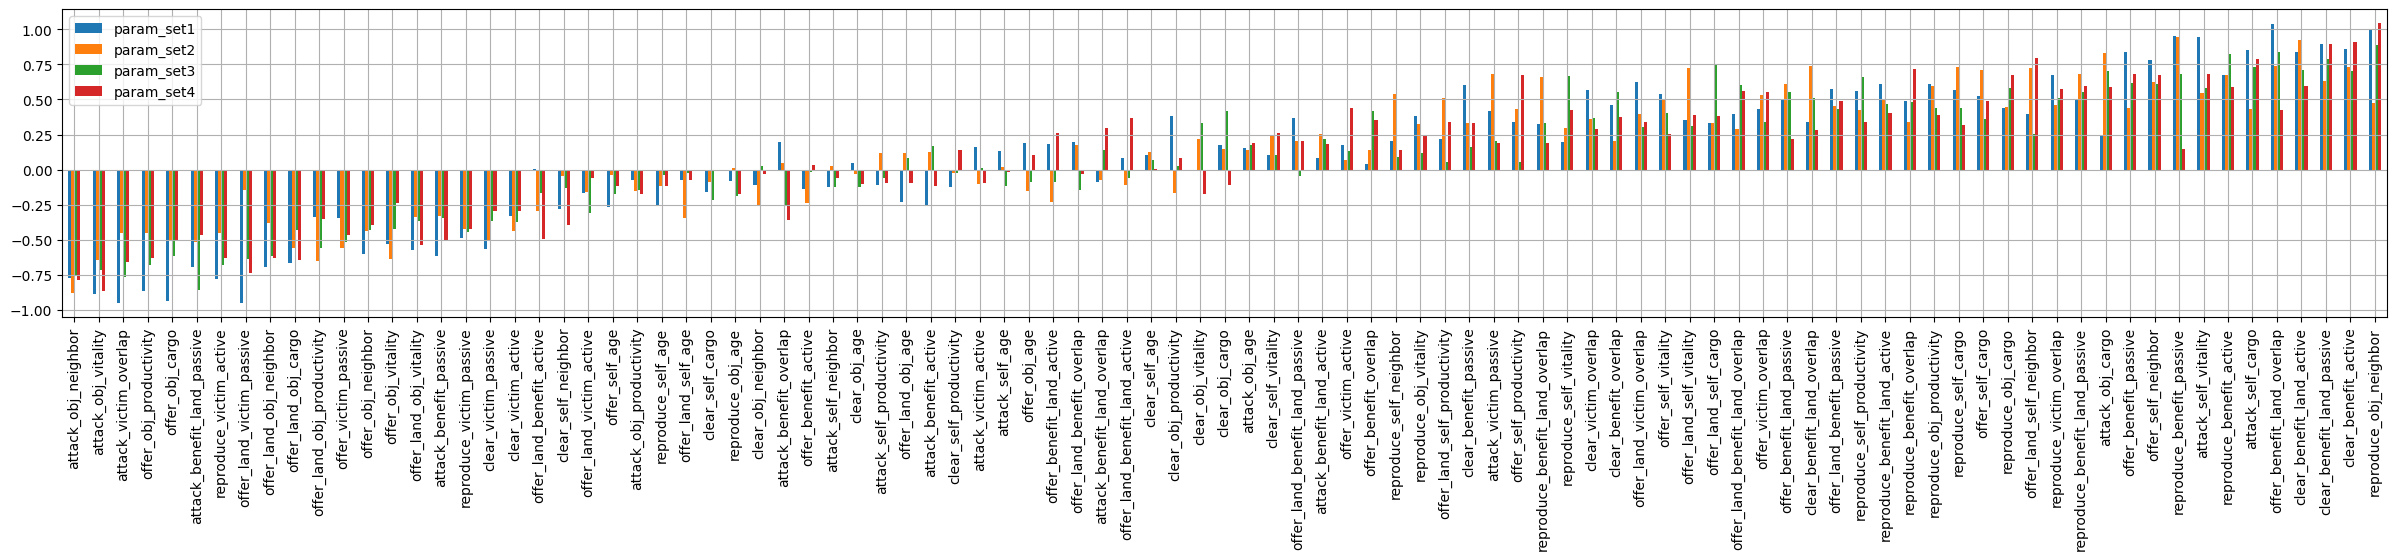

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the dictionaries
df = pd.DataFrame({'param_set1': param_a, 'param_set2': param_b, 'param_set3': param_c, 'param_set4': param_d})

# Calculate the average of each category
df['average'] = df.mean(axis=1)

# Sort the DataFrame by the average
df = df.sort_values('average')

# Drop the average column for plotting
df = df.drop(columns='average')

# Plot the DataFrame as a bar plot
fig, ax = plt.subplots(figsize=(30, 4))
df.plot(ax=ax, kind='bar')
plt.grid()
plt.show()